In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [5]:
#upload the data
df  = pd.read_csv('/content/Tweets.csv')

In [6]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [7]:
df['text'].values[0]

'@VirginAmerica What @dhepburn said.'

In [8]:
print(df.shape)

(14640, 15)


In [9]:
df=df.head(500)
print(df.shape)

(500, 15)


In [12]:
df['airline_sentiment_confidence'].value_counts()

,count
airline_sentiment_confidence,
1.0000,323
0.6559,4
0.6667,4
0.6701,4
0.6705,3
...,...
0.6579,1
0.6515,1
0.3516,1


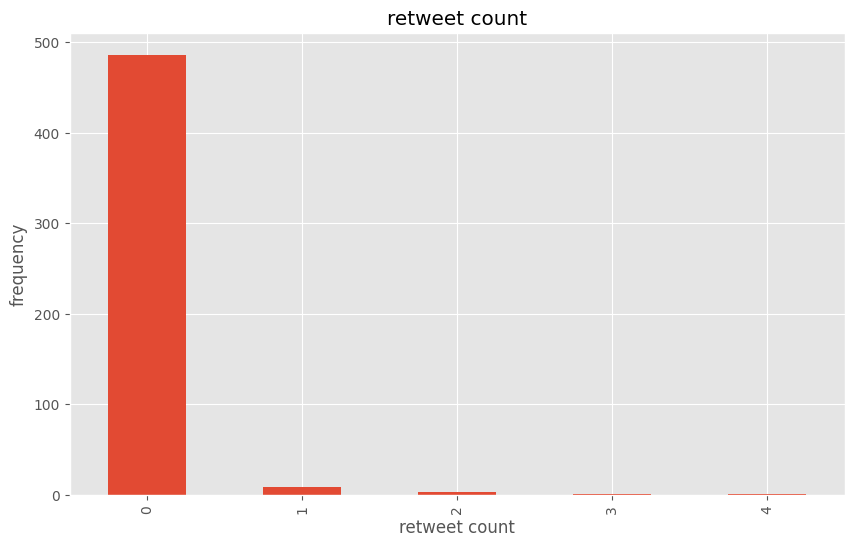

In [17]:

 ax=df['retweet_count'].value_counts().sort_index().plot(kind='bar',title='retweet count',figsize=(10,6))
 ax.set_xlabel('retweet count')
 ax.set_ylabel('frequency')
 plt.show()

In [34]:
example=df['text'][50]
print(example)

@VirginAmerica Is flight 769 on it's way? Was supposed to take off 30 minutes ago. Website still shows "On Time" not "In Flight". Thanks.


In [33]:
import nltk
nltk.download('punkt', download_dir='/content/nltk_data')
# Download the punkt_tab resource for sentence tokenization
nltk.download('punkt_tab', download_dir='/content/nltk_data')


# Add this line to set the path
nltk.data.path.append('/content/nltk_data')

from nltk.tokenize import word_tokenize
nltk.word_tokenize(example)
nltk.word_tokenize(example)

[nltk_data] Downloading package punkt to /content/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /content/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


['Hello', '!', 'This', 'is', 'an', 'example', 'sentence', '.']

In [35]:
example=df['text'][50]
print(example)

@VirginAmerica Is flight 769 on it's way? Was supposed to take off 30 minutes ago. Website still shows "On Time" not "In Flight". Thanks.


In [36]:
nltk.word_tokenize(example)

['@',
 'VirginAmerica',
 'Is',
 'flight',
 '769',
 'on',
 'it',
 "'s",
 'way',
 '?',
 'Was',
 'supposed',
 'to',
 'take',
 'off',
 '30',
 'minutes',
 'ago',
 '.',
 'Website',
 'still',
 'shows',
 '``',
 'On',
 'Time',
 "''",
 'not',
 '``',
 'In',
 'Flight',
 "''",
 '.',
 'Thanks',
 '.']

In [39]:
tokens=nltk.word_tokenize(example)
tokens[:10]

['@', 'VirginAmerica', 'Is', 'flight', '769', 'on', 'it', "'s", 'way', '?']

In [46]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon', download_dir='/content/nltk_data')
nltk.data.path.append('/content/nltk_data')


sia =SentimentIntensityAnalyzer()



[nltk_data] Downloading package vader_lexicon to /content/nltk_data...


In [47]:
sia.polarity_scores('codetech it solutions')

{'neg': 0.0, 'neu': 0.541, 'pos': 0.459, 'compound': 0.1779}

In [48]:
sia.polarity_scores('example')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [49]:
for i, row in tqdm(df.iterrows(),total=len(df)):
  text=row['text']
  tweet_id=row['tweet_id']
  break

  0%|          | 0/500 [00:00<?, ?it/s]

In [51]:
res={}
for i, row in tqdm(df.iterrows(),total=len(df)):
  text=row['text']
  tweet_id=row['tweet_id']
  res[tweet_id]=sia.polarity_scores(text)


  0%|          | 0/500 [00:00<?, ?it/s]

In [52]:
res

{570306133677760513: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 570301130888122368: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 570301083672813571: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 570301031407624196: {'neg': 0.246,
  'neu': 0.754,
  'pos': 0.0,
  'compound': -0.5984},
 570300817074462722: {'neg': 0.321,
  'neu': 0.679,
  'pos': 0.0,
  'compound': -0.5829},
 570300767074181121: {'neg': 0.256,
  'neu': 0.67,
  'pos': 0.074,
  'compound': -0.5945},
 570300616901320704: {'neg': 0.0,
  'neu': 0.678,
  'pos': 0.322,
  'compound': 0.6908},
 570300248553349120: {'neg': 0.16,
  'neu': 0.643,
  'pos': 0.197,
  'compound': 0.1458},
 570299953286942721: {'neg': 0.367,
  'neu': 0.415,
  'pos': 0.218,
  'compound': -0.3477},
 570295459631263746: {'neg': 0.0,
  'neu': 0.642,
  'pos': 0.358,
  'compound': 0.7717},
 570294189143031808: {'neg': 0.375,
  'neu': 0.625,
  'pos': 0.0,
  'compound': -0.8555},
 570289724453216256: {'neg': 0.0,
  'neu': 0.435,
 

here store the data into panda data frames


In [57]:
df_sentiment = pd.DataFrame(res)
print(df_sentiment.head())


          570306133677760513  570301130888122368  570301083672813571  \
neg                      0.0                 0.0                 0.0   
neu                      1.0                 1.0                 1.0   
pos                      0.0                 0.0                 0.0   
compound                 0.0                 0.0                 0.0   

          570301031407624196  570300817074462722  570300767074181121  \
neg                   0.2460              0.3210              0.2560   
neu                   0.7540              0.6790              0.6700   
pos                   0.0000              0.0000              0.0740   
compound             -0.5984             -0.5829             -0.5945   

          570300616901320704  570300248553349120  570299953286942721  \
neg                   0.0000              0.1600              0.3670   
neu                   0.6780              0.6430              0.4150   
pos                   0.3220              0.1970              

In [59]:
pd.DataFrame(res).T

,neg,neu,pos,compound
570306133677760513,0.000,1.000,0.000,0.0000
570301130888122368,0.000,1.000,0.000,0.0000
570301083672813571,0.000,1.000,0.000,0.0000
570301031407624196,0.246,0.754,0.000,-0.5984
570300817074462722,0.321,0.679,0.000,-0.5829
...,...,...,...,...
567745903474540545,0.207,0.793,0.000,-0.6956
567744381432516608,0.149,0.728,0.123,0.0644
567742937325260801,0.000,0.735,0.265,0.5574
567742578561650688,0.000,1.000,0.000,0.0000


In [63]:
vaders=pd.DataFrame(res).T
vaders=vaders.reset_index().rename(columns={'index':'tweet_id'})
vaders=vaders.merge(df,how='left')

In [64]:
vaders.head()

,tweet_id,neg,neu,pos,compound,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,0.000,1.000,0.0,0.0000,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,0.000,1.000,0.0,0.0000,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,0.000,1.000,0.0,0.0000,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,0.246,0.754,0.0,-0.5984,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,0.321,0.679,0.0,-0.5829,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


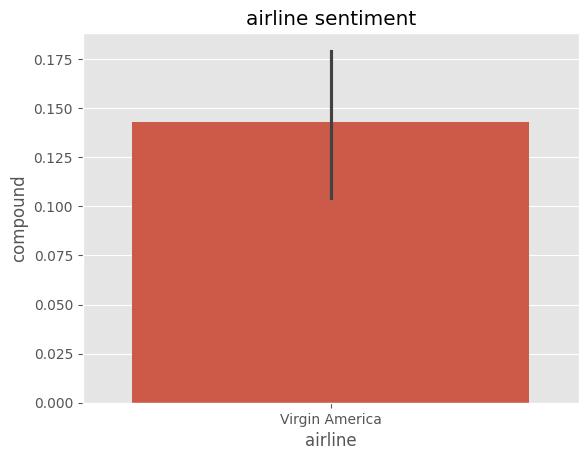

In [65]:
ax=sns.barplot(data=vaders,x='airline',y='compound')
ax.set_title('airline sentiment')
plt.show()

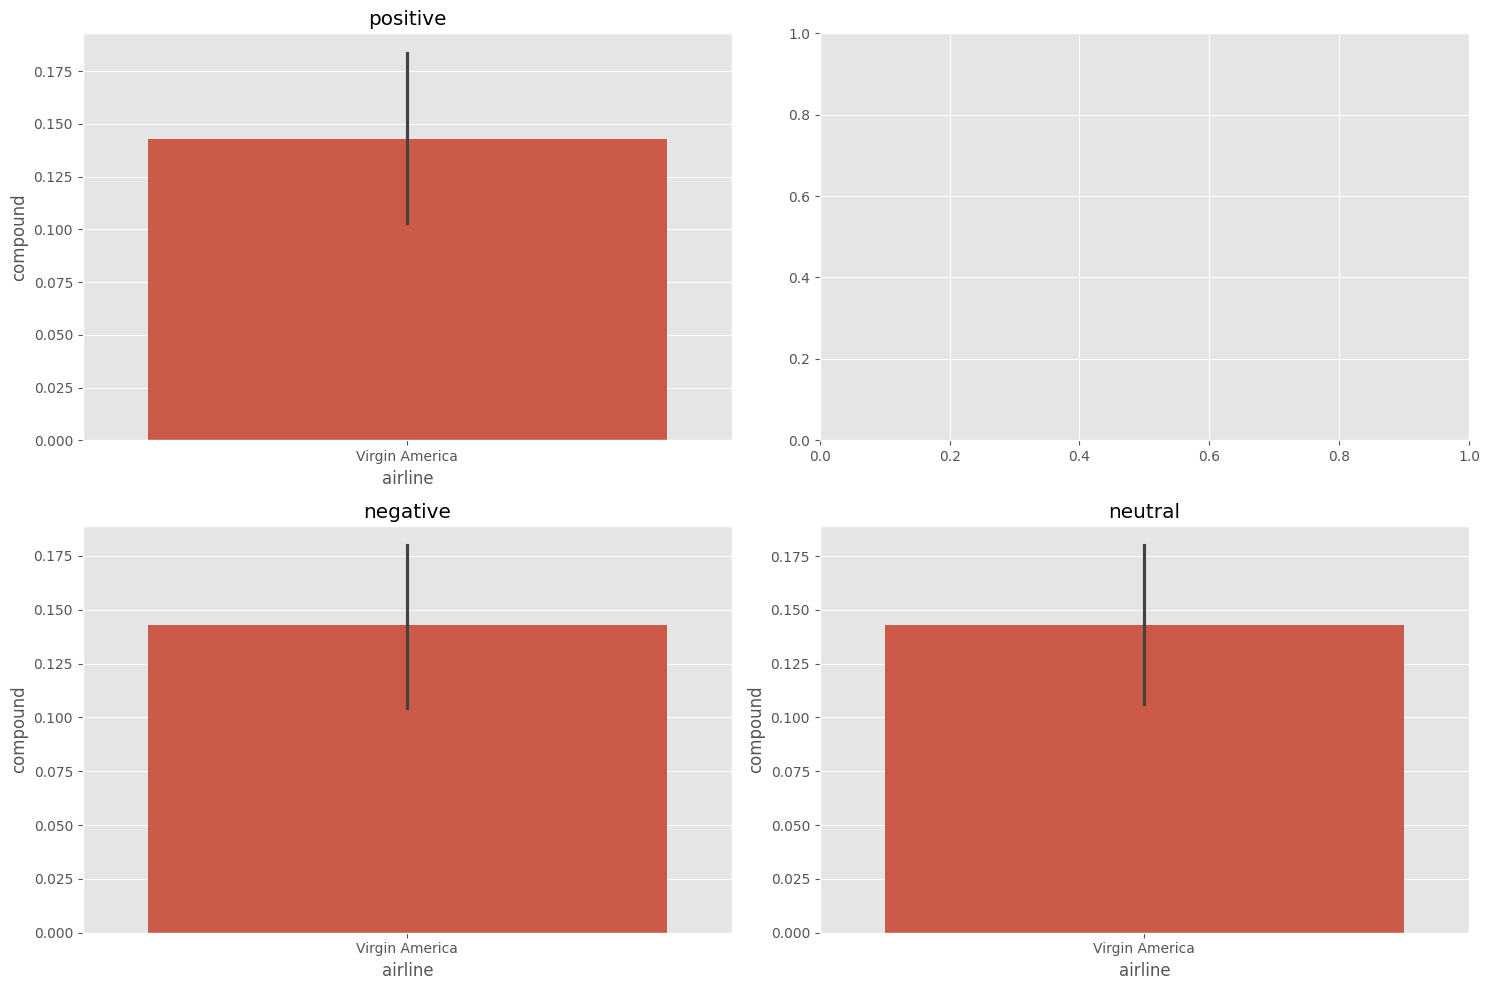

In [74]:
fig,axs=plt.subplots(2,2,figsize=(15,10))
sns.barplot(data=vaders,x='airline',y='compound',ax=axs[0,0])
sns.barplot(data=vaders,x='airline',y='compound',ax=axs[1,0])
sns.barplot(data=vaders,x='airline',y='compound',ax=axs[1,1])
axs[0,0].set_title('positive')
axs[1,0].set_title('negative')
axs[1,1].set_title('neutral')
plt.tight_layout()
plt.show()

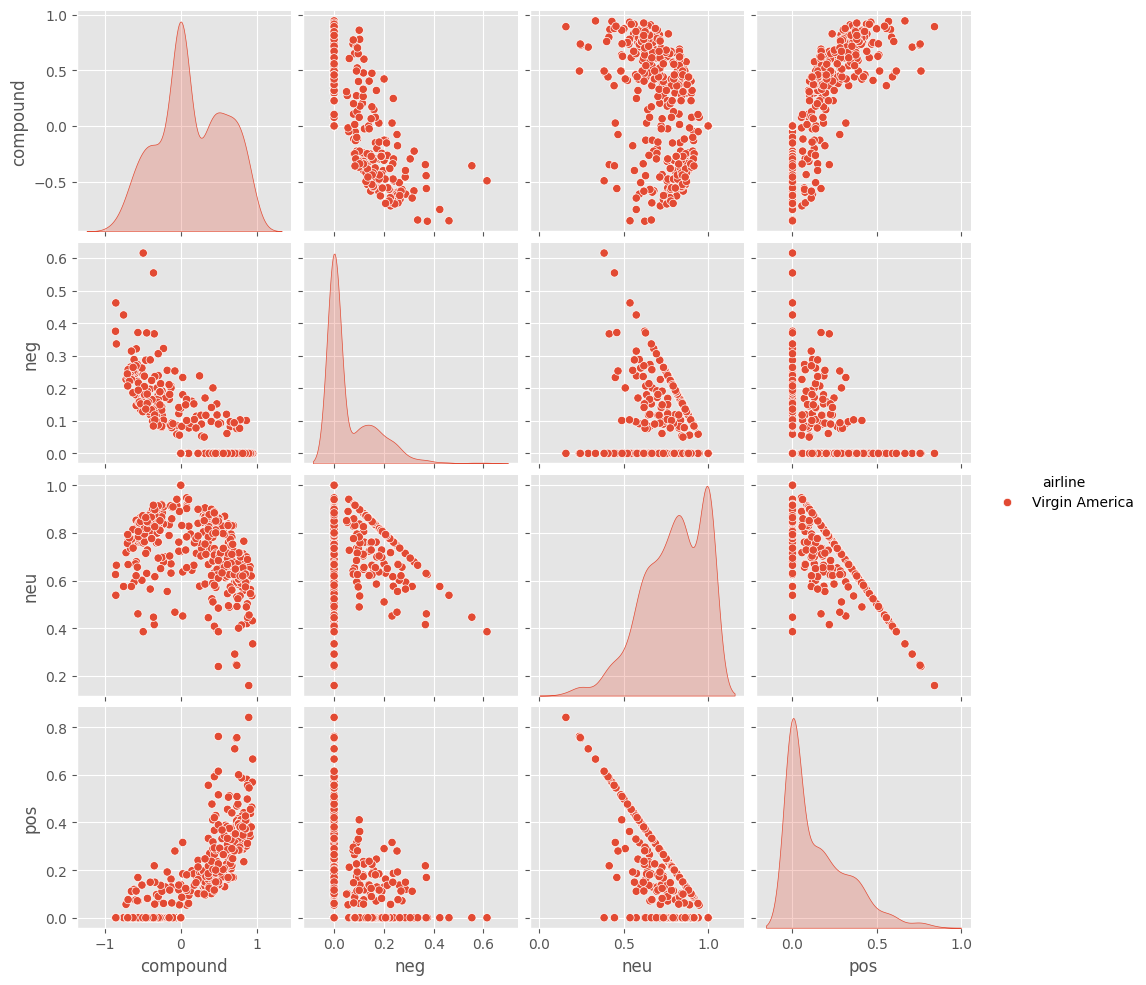

In [80]:
sns.pairplot(data=vaders,hue='airline',vars=['compound','neg','neu','pos'])
plt.show()

In [82]:
from transformers import pipeline
sent_pipeline=pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [83]:
sent_pipeline('codetech it solutions')

[{'label': 'POSITIVE', 'score': 0.9459705948829651}]

In [84]:
sent_pipeline('data analytics is successfully done')

[{'label': 'POSITIVE', 'score': 0.9998183846473694}]